![](pics/header.png)

# Motors and Propellers

## Motor/Propeller Sizing

| Quad Diameter | Prop Size | Stator    | KV        |
|---------------|-----------|-----------|-----------|
| <150mm        | 3"        | 1105-1306 | 3000-4000 |
| 150-250mm     | 4"        | 1806,2204 | 2600-2800 |
| 190-220mm     | 5"        | 2205-2208,2305-2306 | 2300-2600 |
| 220-270mm     | 6"        | 2204-2208,2306 | 1960-2300 |
| 350mm         | 7"        | 2505-2510 | 1200-1600 |
| 450mm         | 8"        | 26xx      | <1200 |

## Sizing Names

| Class  | Dimension |
|--------|-----------|
| Nano   | 80-100 mm |
| Micro  | 100-150 mm |
| Small  | 150-250 mm |
| Medium | 250-400 |
| Large  | +400 mm |

# Motors

-Thrust to weight ratio
    - Need at least **twice** the thrust compared to the weight of the drone

## References

- OscarLiang: [EMAX MT2204-2300KV](https://oscarliang.com/emax-mt2204-mt1806-motor-quadcopter-1804/)
- OscarLiang: [How to Choose Propeller for Mini Quad](https://oscarliang.com/choose-propellers-mini-quad/)
- OscarLiang: [How to Choose FPV Drone Motors](https://oscarliang.com/quadcopter-motor-propeller/#kv-vs-torque-constant)
- [Oscarliang.com very detailed overview of motors and propellers](https://oscarliang.com/quadcopter-motor-propeller/)
- [FAA UAV Ruling, 28 Dec 2020](https://www.faa.gov/news/media/attachments/OOP_Executive_Summary.pdf)
- ArsTechnica: [FAA finally sets rules for piloting small drones](https://arstechnica.com/tech-policy/2020/12/faa-finally-sets-rules-for-piloting-small-drones/)
- [ArduPilot docs](https://ardupilot.org/copter/index.html)
- [Choose the Right Size Motors](https://quadquestions.com/blog/2017/02/22/choose-right-size-motors-drone/)
- [miniquadtestbench](https://www.miniquadtestbench.com/motor-explorer.html)
- [HOW TO CHOOSE MOTOR FOR RACING DRONE & QUADCOPTER](https://oscarliang.com/quadcopter-motor-propeller/)

## Motor Parts

<table>
    <tr>
        <td>
            <img src="pics/motor-parts-1.jpg" height="300px"/>
        </td>
        <td>
            <img src="pics/motor-parts-2.jpg" height="300px"/>
        </td>
    </tr>
</table>

- **Stator:** The Size of brushless motors in RC is normally indicated by a 4-digit number – AABB. “AA” 
is the stator width (or stator diameter) while “BB” is the stator height, both are measured in mm
    - Taller stator = more power at higher RPM
    - Wider stator = more torque at lower RPM
- **Efficiency:** Higher KV motors at high RPMs are more efficient, but have less torque
- **Power:** Ideally want a 2:1 (minimum), 4:1 (aerobatic), or 8:1 (racing) power to weight ratio
- **Torque:** Motors with larger stator size have more torque, while smaller stators have less torque 

## Motor Naming

- Motors are rated by a 4 digit number AABB
    - Example 2213: stator is 22mm in diameter, stator height is 13mm
    - Taller stator gives **more power** at **higher** RPM
    - Wider stator gives **more torque** at **lower** RPM
- KV ratings relate RPMs to voltage.
    - 900KV motor at 2V produces 1800RPM
    - Typically lower KV motors produce more torque
- Motors for 3-6 inch diameter props have M5 shafts
- Typically have 16x16 mm mount points
- 22XX and 23XX motors typically have 12 poles and 14 magnets
    - More poles = smoother flight
    - Fewer poles = more powerful motors

## Propellers

Propellers exist in different length, pitch and number of blades:

- The **length** of a propeller is the diameter of a disc the prop makes when it’s spinning
- **Pitch** can be defined as the travel distance of one single prop rotation
- The **number of blades** determines how much it bites onto the air, but it also makes it *less efficient* and puts *higher load on the motor*. However, more blades also produces more thrust.

| Propeller Size | Frame Size | Motor Size | KV    |
|----------------|------------|------------|-------|
| 3"             | <150mm     | 1105-1306  | >3000 |
| 4"             | 150-180mm  | 1806-2204  | 2700  |
| 5"             | 210mm      | 2205/8-2305/6 | 2300-2700 |
| 6"             | 250mm      | 2206/8-2306 | 2000-2300 |

## Propeller Specs

- 4 digit number in AABB, AA is tip-to-tip length in inches and BB is pitch in inches 
    - Example: 8045 means, 8 inch diameter with a pitch of 4.5 inches
    - Example: GemFan 5030 has 5.0" length which will sweep out a circle 5" in diameter and a pitch of 3.0"
    - Higher pitch produces more downward force
    
## Matching Motors and Propellers

- Typically you would pair **high pitch** propellars with **low KV** motors or the reverse
- For a 5 in prop, common motors are 2207, 2306, 2307, and 2407
- High torque, high power motors can create vibration and feedback into the IMU on the flight controller causing instability. Soft mounting your flight controller can help

## Orientation

![](pics/motor-configuration.png)

## Sizing Motors

You need to have enough thrust to lift your quadcopter:

1. Get quadcopter mass in grams
1. Double mass so your motors can run at 50% throttle and still lift your quadcopter
1. Multiply by a factor of safety like 1.2 which is adding another 20% performance incase your mass is wrong, wind loading, etc.
1. Then divide by the number of motors on your copter, assuming this is a quadcopter you would divide by 4. If this was an octocopter, then you would divide by 8.

```python
quadmass = 800 # grams

# double that for 50% throttle
# add another 20% for safety factor
needed_thrust = quadmass * 2 * 1.2

# divide by 4 for each motor, assuming an quadcopter
each_motor = needed_thrust / 4
```

## Electronic Speed Control (ESC)

### ESC Timing

- PWM control at 50Hz
- Pulse widths in microseconds:
    - min: 900-1050
    - middle: 1500
    - max: 1800-2000
    - *Note:* every ESC is different, so check limits

### Initialize ESC

1. Power on: 3 rising beeps (short)
    - Will continue to do this multiple times until the following commands successfully sent
1. set to middle throttle: 1 low beep (long)
    - Wait a second
1. set zero throttle: 1 high beep (long)
    - Wait a second
1. ESC is ready to be commanded anywhere from zero throttle (min pulse) to max throttle (max pulse)

# Hobbymate 2204-2300Kv Brushless Motors

## Features:

- Hobbymate 2204 Motors : Air suction system design, rapid cooling, higher efficiency and longer life U clip prevents bearing from loosening Original Japanese bearings, no counterfeit bearings from any other source High precision CNC machining exquisite design, stern quality control revealing the user taste and position

## 2204 Motor Specification :

- KV: 2300
- MAX Thrust: 440 g        
- Length: 32.2 mm
- NO.OF CELL:2~3S        
- Weight: 25 g
- Framework: 12N14P     
- Shaft : 3 mm
- Propeller: 5" ~ 6"             
- Diameter: 27.9 mm
- Silver hub: [CCW](https://hobbymatehobby.com/product/2204-2300kv-cw-brushless-motor-2204ccw-w/)
- Black hub: [CW](https://hobbymatehobby.com/product/2204-2300kv-ccw-brushless-motor-2204ccw-b/)

<table>
    <tr>
        <td>
            <img src="pics/2204-front.jpg" height="300px"/>
        </td>
        <td>
            <img src="pics/2204-back.jpg" height="300px"/>
        </td>
    </tr>
</table>

# Kv (Velocity Constant)

“Kv” refers to the constant velocity of a motor. It is measured by the number
of revolutions per minute (rpm) that a motor turns when 1V (one volt) is
applied with no load attached to that motor. The Kv rating of a brushless motor
is the ratio of the motor’s unloaded rpm to the peak voltage on the wires
connected to the coils.

Knowing the Kv rating of a motor will help you determine how fast that motor will rotate when a given voltage is applied to it. For example:

> a 980Kv motor powered by an 11.1V battery would spin at 10,878 rpm (980 x 11.1) with no load

A change in voltage will change the rpm and will require changing the propeller to avoid overloading the motor. Kv allows you to get a handle on the torque that can be expected from a particular motor. Torque is determined by the number of winds on the armature and the strength of the magnets. A low Kv motor has more winds of thinner wire—it will carry more volts at fewer amps, produce higher torque, and swing a bigger prop. A high Kv motor has fewer winds of thicker wire that carry more amps at fewer volts and spin a smaller prop at high revolutions.

The torque (T) is equal t othe torque constant ($K_t$) and the current (i):

$$
T = K_t i \\
K_t = \frac {1}{KV}
$$

while the KV of a motor is equal to the inverse of the torque constant. So a motor with a KV of 3000
has less torque than a motor with a KV of 1000.

## Model

Assuming:

- HobbyMate 2204 2300Kv brushless motor, however, only found data for the EMAX
- GemFan 5030 propeller
- 11.1V battery

| Motor         | Voltage (V) | Propeller | Current (A) | Thrust (g) | Power (W) | RPM |
|---------------|-------------|-----------|-------------|------------|-----------|-----|
| MT2204-2300Kv | 11.1        | 5030      | 7.5         | 310        | 83.25     | 20100 |

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
rpm2w = 2*np.pi/60
w2rpm = 60/2/np.pi

rad2deg = 180/np.pi
deg2rad = np.pi/180

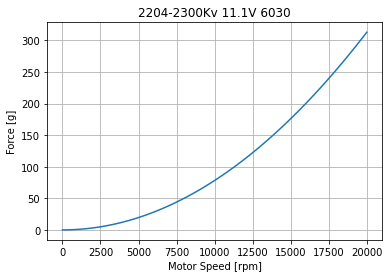

In [20]:
rpm = np.arange(0,20000)
kf = 7.00e-7
F = 1000 * kf * (rpm2w*rpm)**2 / 9.81
plt.plot(rpm, F)
plt.ylabel("Force [g]")
plt.xlabel("Motor Speed [rpm]")
plt.title("2204-2300Kv 11.1V 6030")
plt.grid(True);